In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("redWineData.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Chart

Text(0, 0.5, 'Quality')

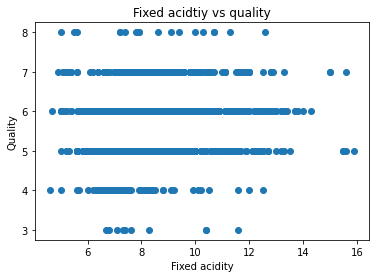

In [5]:
plt.scatter(data['fixed acidity'], data['quality'])
plt.title("Fixed acidtiy vs quality")
plt.xlabel("Fixed acidity")
plt.ylabel("Quality")

#no clear releation

Text(0, 0.5, 'Quality')

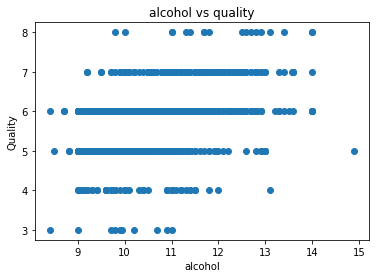

In [6]:
plt.scatter(data['alcohol'], data['quality'])
plt.title("alcohol vs quality")
plt.xlabel("alcohol")
plt.ylabel("Quality")

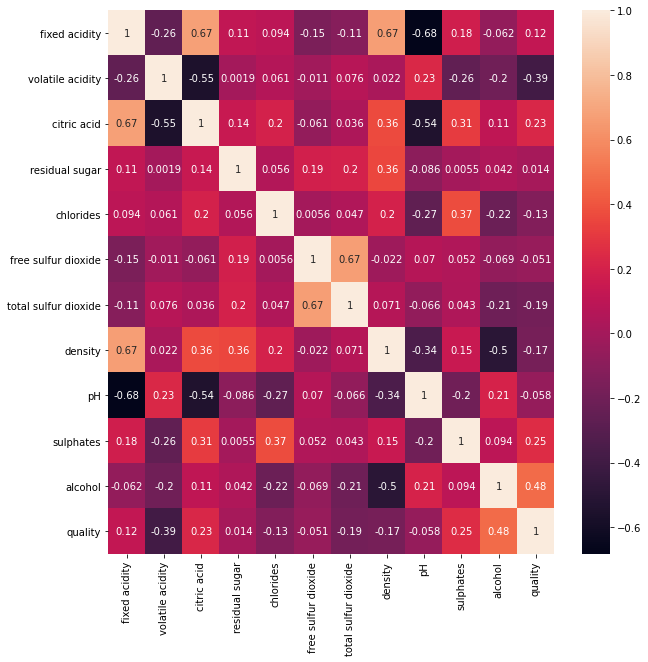

In [7]:
plt.figure(figsize=(10, 10))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [8]:
cor_target = abs(cor['quality'])

relevant_features = cor_target[cor_target > 0.15]
names = [index for index, value in relevant_features.iteritems()]
names.remove('quality')
names

['volatile acidity',
 'citric acid',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [9]:
#creating x and y 
x = data[names]
y = data['quality']
x.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.70,0.00,34.0,0.9978,0.56,9.4
1,0.88,0.00,67.0,0.9968,0.68,9.8
2,0.76,0.04,54.0,0.9970,0.65,9.8
3,0.28,0.56,60.0,0.9980,0.58,9.8
4,0.70,0.00,34.0,0.9978,0.56,9.4


# Model building

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 6)
(320, 6)
(1279,)
(320,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
# making predictions
predictions = lr.predict(x_test)

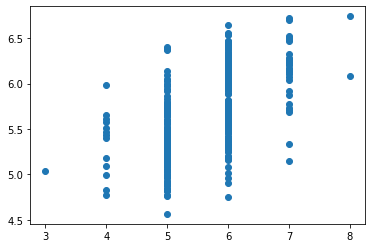

In [14]:
plt.scatter(y_test, predictions)

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.38365788730229305
0.6194012328872885


In [25]:
# new_data = [[0.28, 0.56, 103, 0.9969, 0.75, 10.5]]

# new_predictions = lr.predict(new_data)
# print(new_predictions)

[5.89076602]


In [18]:
import pickle
with open('model/lr.pkl', 'wb') as file:
    pickle.dump(lr, file)